# Bud Spencer and Terence Hill movies

## [Download worked project](../../_static/generated/bud-spencer-terence-hill-movies-prj.zip) 

[Browse files online](https://github.com/DavidLeoni/softpython-en/tree/master/projects/bud-spencer-terence-hill-movies)

![expected-1970-1975-en-preview](expected-1970-1975-en.png)

Among the greatest gifts of Italy to the world we can certainly count Terence Hill and Bud Spencer movies. 

Their film career can be found in [Wikidata](https://wikidata.org/), a project by the Wikimedia foundation which aims to store only machine-readable data, like numbers, strings, and so on interlinked with many references. Each entity in Wikidata has an identifier, for example Terence Hill is the [entity Q243430](http://www.wikidata.org/entity/Q243430) and Bud Spencer is [Q221074](http://www.wikidata.org/entity/Q221074).

Wikidata can be queried using the SPARQL language: we performed [this query](https://query.wikidata.org/#SELECT%20%3Fstar%20%3FstarLabel%20%3Fitem%20%3FitemLabel%20%28MIN%28%3Fdate%29%20AS%20%3FfirstReleased%29%0AWHERE%20%7B%0A%20%20%3Fitem%20wdt%3AP161%20%3Fstar%3B%0A%20%20%20%20%20%20%20%20wdt%3AP577%20%3Fdate.%0A%20%20%20%20%0A%20%20FILTER%20%28%3Fstar%20%3D%20wd%3AQ221074%20%7C%7C%20%3Fstar%20%3D%20wd%3AQ243430%29%20%20%0A%20%20%20%20%20%20%20%20%20%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22en%22.%20%7D%0A%20%20OPTIONAL%20%7B%20%3Fitem%20wdt%3AP18%20%3F_image.%20%7D%0A%7D%20GROUP%20BY%20%3Fstar%20%3FstarLabel%20%3Fitem%20%3FitemLabel%20%3F_image%0AORDER%20BY%20%28%3Fdate%29) repeated for several languages, and downloaded CSV files (among the many formats which can be chosen). Even if not necessary for the purposes of the exercise, you are invited to play a bit with the interface, like trying different visualizations (i.e. try clicking the eye in the middle-left corner and then select Graph) - or see [other examples](https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service/queries/examples/human).

<div class="alert alert-warning"> 
     
**REQUIREMENTS: Having read** [Relational data tutorial](https://en.softpython.org/relational/relational1-intro-sol.html#) **, which contains also instructions for installing required libraries.**
    
</div>    

## What to do

1. Unzip exercises zip in a folder, you should obtain something like this:

```
bud-spencer-terence-hill-movies-prj
    bud-spencer-terence-hill-movies.ipynb
    bud-spencer-terence-hill-movies-sol.ipynb
    bud-spencer-terence-hill-movies-de.csv
    bud-spencer-terence-hill-movies-en.csv
    bud-spencer-terence-hill-movies-es.csv
    bud-spencer-terence-hill-movies-it.csv
    soft.py
    jupman.py
```

<div class="alert alert-warning">

**WARNING: to correctly visualize the notebook, it MUST be in an unzipped folder !**
</div>

2. open Jupyter Notebook from that folder. Two things should open, first a console and then a browser. The browser should show a file list: navigate the list and open the notebook `bud-spencer-terence-hill-movies.ipynb`

3. Go on reading the notebook, and write in the appropriate cells when asked

Shortcut keys:

- to execute Python code inside a Jupyter cell, press `Control + Enter`

- to execute Python code inside a Jupyter cell AND select next cell, press `Shift + Enter`

- to execute Python code inside a Jupyter cell AND a create a new cell aftwerwards, press `Alt + Enter`

- If the notebooks look stuck, try to select `Kernel -> Restart`

## The datasets

You are given some CSVs of movies, all having names ending in `-xy.csv`, where `xy` can be a language tag like `it`, `en`, `de`, `es`... They mostly contain the same data except for the movie labels which are in the corresponding language. The final goal will be displaying the network of movies and put in evidence the ones co-starring the famous duo. 

Each file row contains info about a single actor starring in a movie. Multiple lines with same movie id will mean multiple actors are co-starring. We can see an excerpt of **first four** lines of english version: notice second movie has id [Q180638](http://www.wikidata.org/entity/Q180638) and is co-starred by both Bud Spencer and Terence Hill

star,starLabel,movie,movieLabel,firstReleased

http://www.wikidata.org/entity/Q221074,Bud Spencer,http://www.wikidata.org/entity/Q116187,Thieves and Robbers,1983-02-11T00:00:00Z

http://www.wikidata.org/entity/Q221074,Bud Spencer,http://www.wikidata.org/entity/Q180638,Odds and Evens,1978-10-28T00:00:00Z

http://www.wikidata.org/entity/Q243430,Terence Hill,http://www.wikidata.org/entity/Q180638,Odds and Evens,1978-10-28T00:00:00Z



## 1. load

Write a function that given a `filename_prefix` and list of `languages`, parses the corresponding files and RETURNS a **dictionary of dictionaries**, which maps movies id to movies data, in the format as in the exerpt.

- When a label is missing, you will find instead an id like `Q3778078`: substitute it with empty string
 (HINT: to recognize ids you might use `is_digit()` method) 
- convert date numbers to proper integers
- **DO NOT** put constant ids nor language tags in the code (so no `'Q221074'` nor `'it'` ...)

**Example** (complete output can be found in [expected_db.py](expected_movies_db.py)):

```python
>>> load('bud-spencer-terence-hill-movies', ['en', 'it', 'de'])
{
  'Q116187': {
              'actors': [('Q221074', 'Bud Spencer')],
              'first_release': (1983, 2, 11),
              'names': {'de': 'Bud, der Ganovenschreck',
                        'en': 'Thieves and Robbers',
                        'it': 'Cane e gatto'}
             }
  'Q180638': {
              'actors': [('Q221074', 'Bud Spencer'), ('Q243430', 'Terence Hill')],
              'first_release': (1978, 10, 28),
              'names': {'de': 'Zwei sind nicht zu bremsen',
                        'en': 'Odds and Evens',
                        'it': 'Pari e dispari'}
             }
  'Q231967': {
              'actors': [('Q221074', 'Bud Spencer'), ('Q243430', 'Terence Hill')],
              'first_release': (1981, 1, 1),
              'names': {'de': 'Zwei Asse trumpfen auf',
                        'en': 'A Friend Is a Treasure',
                        'it': 'Chi trova un amico, trova un tesoro'}
             }
  .
  .
  .
}
```

In [2]:

import csv

def load(filename_prefix, languages):
    
    
    first_lang = True
    ret = {}
    for lang in languages:        
        fn = '%s-%s.csv' % (filename_prefix, lang)
        #print("Reading", fn)
        with open(fn, encoding='utf-8', newline='') as f:            
            
            my_reader = csv.DictReader(f, delimiter=',')            
            for d in my_reader:            
                movie_id = d['movie'][len('http://www.wikidata.org/entity/'):]            
                actor = (d['star'][len('http://www.wikidata.org/entity/'):], d['starLabel'])
                
                
                if d['movieLabel'][0] == 'Q' and d['movieLabel'][1].isdigit():
                    #print('FOUND MISSING LABEL', d['movieLabel'], 'FOR', lang)
                    movie_label_fixed = ''
                else:
                    movie_label_fixed = d['movieLabel']
                    
                if first_lang:
                    if movie_id in ret:                
                        ret[movie_id]['actors'].append(actor)                
                    else:
                        ret[movie_id] = {'actors': [actor],
                                         'names' : {lang: movie_label_fixed},
                                         'first_release' : tuple([int(s) for s in d['firstReleased'][:10].split('-')])
                        }
                else:                    
                    ret[movie_id]['names'][lang] = movie_label_fixed
                        
            #print("Found", len(ret), "movies")
        first_lang = False
        
    return ret
    
    
movies_db = load('bud-spencer-terence-hill-movies', ['en', 'it', 'de'])

#movies_db = load('bud-spencer-terence-hill-movies', ['es', 'en', 'de','it'])
movies_db


EXERPT:

{
  'Q116187': {
              'actors': [('Q221074', 'Bud Spencer')],
              'first_release': (1983, 2, 11),
              'names': {'de': 'Bud, der Ganovenschreck',
                        'en': 'Thieves and Robbers',
                        'it': 'Cane e gatto'}
             }
  'Q180638': {
              'actors': [('Q221074', 'Bud Spencer'), ('Q243430', 'Terence Hill')],
              'first_release': (1978, 10, 28),
              'names': {'de': 'Zwei sind nicht zu bremsen',
                        'en': 'Odds and Evens',
                        'it': 'Pari e dispari'}
             }
  'Q231967': {
              'actors': [('Q221074', 'Bud Spencer'), ('Q243430', 'Terence Hill')],
              'first_release': (1981, 1, 1),
              'names': {'de': 'Zwei Asse trumpfen auf',
                        'en': 'A Friend Is a Treasure',
                        'it': 'Chi trova un amico, trova un tesoro'}
             }
  .
  .
  .
}


In [2]:

import csv

def load(filename_prefix, languages):
    raise Exception('TODO IMPLEMENT ME !')
    
movies_db = load('bud-spencer-terence-hill-movies', ['en', 'it', 'de'])

#movies_db = load('bud-spencer-terence-hill-movies', ['es', 'en', 'de','it'])
movies_db


In [3]:
# TESTING
from pprint import pformat; from expected_movies_db import expected_movies_db
for sid in expected_movies_db.keys():
    if sid not in movies_db: print('\nERROR: MISSING movie', sid); break    
    for k in expected_movies_db[sid]:
        if k not in movies_db[sid]:
            print('\nERROR at movie', sid,'\n\n   MISSING key:', k); break    
        if expected_movies_db[sid][k] != movies_db[sid][k]:
            print('\nERROR at movie', sid, 'key:',k)
            print('  ACTUAL:\n', pformat(movies_db[sid][k]))
            print('  EXPECTED:\n', pformat(expected_movies_db[sid][k]))
            break
if len(movies_db) > len(expected_movies_db):
    print('ERROR! There are more movies than expected!')
    print('  ACTUAL:\n', len(movies_db))
    print('  EXPECTED:\n', len(expected_movies_db))

## 2. save_table

Write a function that given a movies db and a list of `languages`, writes a new file `merged.csv` 

- separate actor names with `and`
- use only the year as date
- file must be formatted like this 

```
movie_id,name en,name it,first_release,actors
Q116187,Thieves and Robbers,Cane e gatto,1983,Bud Spencer
Q180638,Odds and Evens,Pari e dispari,1978,Bud Spencer and Terence Hill
```

Complete expected file is in [expected-merged.csv](expected-merged.csv)

In [5]:
import csv

def save_table(movies, languages):
    
   
    with open('merged.csv', 'w', encoding='utf-8', newline='') as csv_out:
        my_writer = csv.writer(csv_out, delimiter=',')

        header = ['movie_id'] + ['name ' + lan for lan in languages] + ['first_release', 'actors']
        my_writer.writerow(header)
        
        for movie_id in movies:
            movie = movies[movie_id]            
            actors_names = ' and '.join([actor[1] for actor in movie['actors']])
            row = [movie_id]
            row.extend([movie['names'][language] for language in languages])
            row.extend([movie['first_release'][0], actors_names])
            
            my_writer.writerow(row)                   
        print('saved file to merged.csv')
        
    
save_table(movies_db, ['en','it'])
#save_table(movies_db, ['de'])


saved file to merged.csv



In [5]:
import csv

def save_table(movies, languages):
    raise Exception('TODO IMPLEMENT ME !')    
    
save_table(movies_db, ['en','it'])
#save_table(movies_db, ['de'])


saved file to merged.csv



In [6]:
# TESTING
with open('expected-merged.csv',encoding='utf-8', newline='') as expected_f:
    with open('merged.csv',encoding='utf-8', newline='') as f:
        expected_reader = csv.reader(expected_f, delimiter=',')            
        reader = csv.reader(f, delimiter=',')
        i = 0
        for expected_row in expected_reader: 
            try:
                row = next(reader)
            except:
                print('ERROR at row', i, ': ACTUAL rows are less than EXPECTED!')
                break                
            for j in range(len(expected_row)):
                if expected_row[j] != row[j]:
                    print('ERROR at row', i, '  cell index', j)
                    print(row)
                    print('\nACTUAL  :', row[j])
                    print('\nEXPECTED:', expected_row[j])
                    break
            i += 1    


## 3. show_graph

Display a NetworkX graph of movies ([see examples](https://en.softpython.org/relational/relational1-intro-sol.html#Fancy-networkx-graphs)) from `since_year` (included) to  `until_year` (included), in the given `language`

* display actor names as capitalized
* display co-starred movies, non co-starred movies and actors with different colors by setting node attributes `style='filled'` and i.e. `fillcolor='green'` (see [some color names](https://www.w3.org/wiki/CSS/Properties/color/keywords))


**DO NOT** use labels as node ids

**DO NOT** write constants in your code, so no `'Terence'` nor `'TERENCE'`...

**Example 1**

```python
>>> show_graph(movies_db, 1970, 1975, 'en')
```
![expected-1970-1975-en.png](expected-1970-1975-en.png)

**Example 2**

```python
>>> show_graph(movies_db, 1970, 1974, 'it')
```
![expected-1970-1974-it.png](expected-1970-1974-it.png)

Image saved to file:  expected-1970-1975-en.png


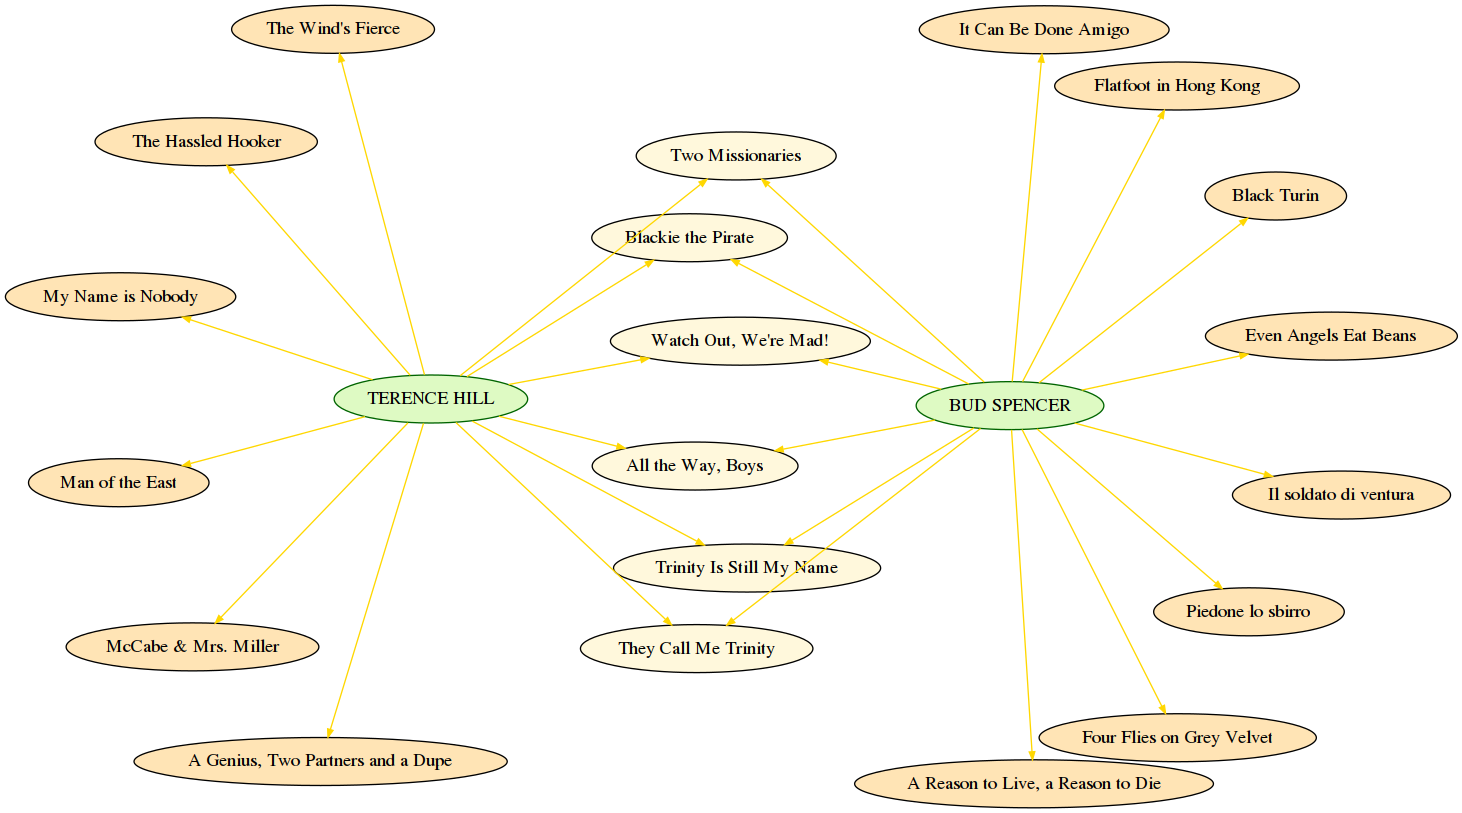

In [7]:

import networkx as nx
from soft import draw_nx

def show_graph(movies, since_year, until_year, language):
    
    G = nx.DiGraph()       
    G.graph['graph']= { 'layout':'neato'}  # don't delete these!
    
    
    for movie_id in movies:
        movie = movies[movie_id]
        if movie['first_release'][0] >= since_year and movie['first_release'][0] <= until_year:
            if len(movie['actors']) > 1:
                fillcolor = 'cornsilk'
            else:
                fillcolor = 'moccasin'
            G.add_node(movie_id, label=movie['names'][language], fillcolor=fillcolor, color='black', style='filled', fontcolor='black')
            for actor in movie['actors']:            
                G.add_node(actor[0], fillcolor='#defac3', fontcolor='black', color='darkgreen', style='filled', label=actor[1].upper())
                # IMPORTANT: edges connect movie_ids ,  NOT labels !!!!
                G.add_edge(actor[0], movie_id, color='gold')
                                            
    draw_nx(G, save_to='expected-%s-%s-%s.png' % (since_year,until_year,language))
    
    
show_graph(movies_db, 1970, 1975, 'en')    

In [7]:

import networkx as nx
from soft import draw_nx

def show_graph(movies, since_year, until_year, language):
    
    G = nx.DiGraph()       
    G.graph['graph']= { 'layout':'neato'}  # don't delete these!
    
    raise Exception('TODO IMPLEMENT ME !')
    
show_graph(movies_db, 1970, 1975, 'en')    

In [8]:

show_graph(movies_db, 1970, 1974, 'it')